<span style="font-size: 32px; color:#0B776D; margin-left:300px;">Covid-19 Analysis</span>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
%matplotlib inline


<span style="font-size: 32px; color:#0B776D;margin-left:70px;">Analysis of the situation with COVID-19 in countries</span>

In [3]:
corona = pd.read_csv("COVID-19 Coronavirus.csv")
corona.drop(columns = ['ISO 3166-1 alpha-3 CODE', "Tot Cases//1M pop", "Tot Deaths/1M pop", "Other names"],axis = 1,inplace=True)
corona.insert(loc=5, column='Cases percentage', value=(corona["Total Cases"]/corona["Population"]*100))
corona

Country  Population Continent  Total Cases  Total Deaths  \
0          Afghanistan    40462186      Asia       177827          7671   
1              Albania     2872296    Europe       273870          3492   
2              Algeria    45236699    Africa       265691          6874   
3              Andorra       77481    Europe        40024           153   
4               Angola    34654212    Africa        99194          1900   
..                 ...         ...       ...          ...           ...   
220  Wallis and Futuna       10894   Oceania          454             7   
221     Western Sahara      623031    Africa           10             1   
222              Yemen    30975258      Asia        11806          2143   
223             Zambia    19284482    Africa       317076          3967   
224           Zimbabwe    15241601    Africa       246525          5446   

     Cases percentage  Death percentage  
0            0.439489          4.313743  
1            9.534881          1.275058  
2            0.587335          2.587216  
3           51.656535          0.382271  
4            0.286239          1.915438  
..                ...               ...  
220          4.167432          1.541850  
221          0.001605         10.000000  
222          0.038114         18.151787  
223          1.644203          1.251120  
224          1.617448          2.209107  

[225 rows x 7 columns]

<span style="font-size: 32px; color:#0B776D;">Top 10 countries with largest :<li><U>Population per year</U></li>  <li><U>Total Casses per year</U></li> <li><U>Total Deaths per year</U></li> <li><U>Death percentage per year</U></li></span>

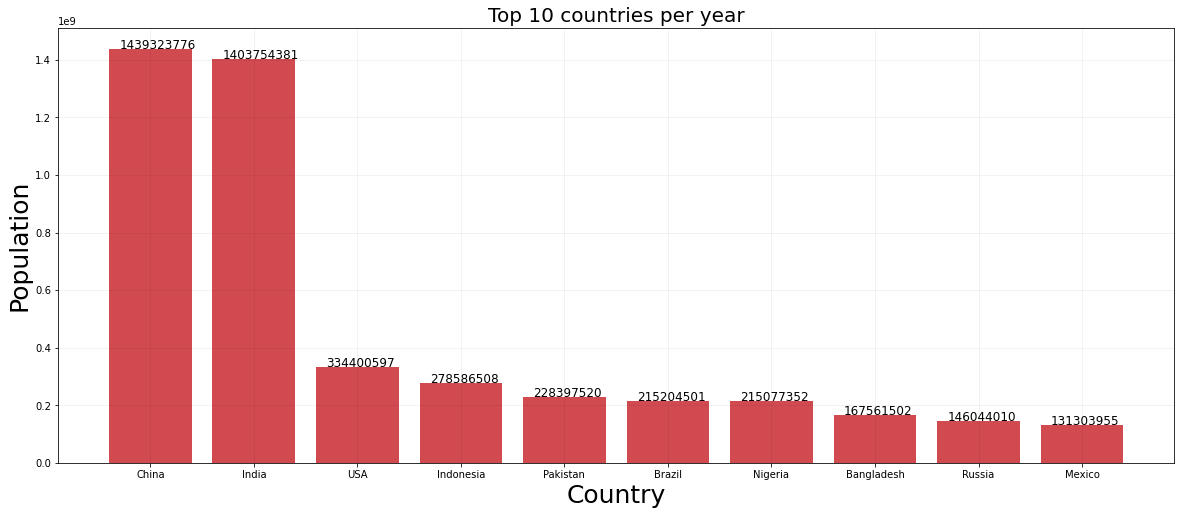

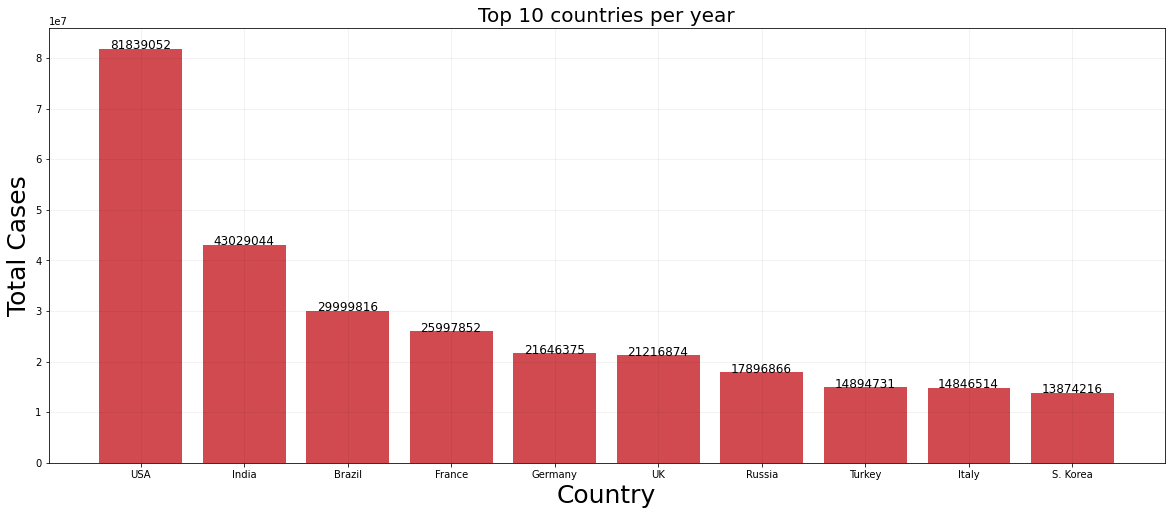

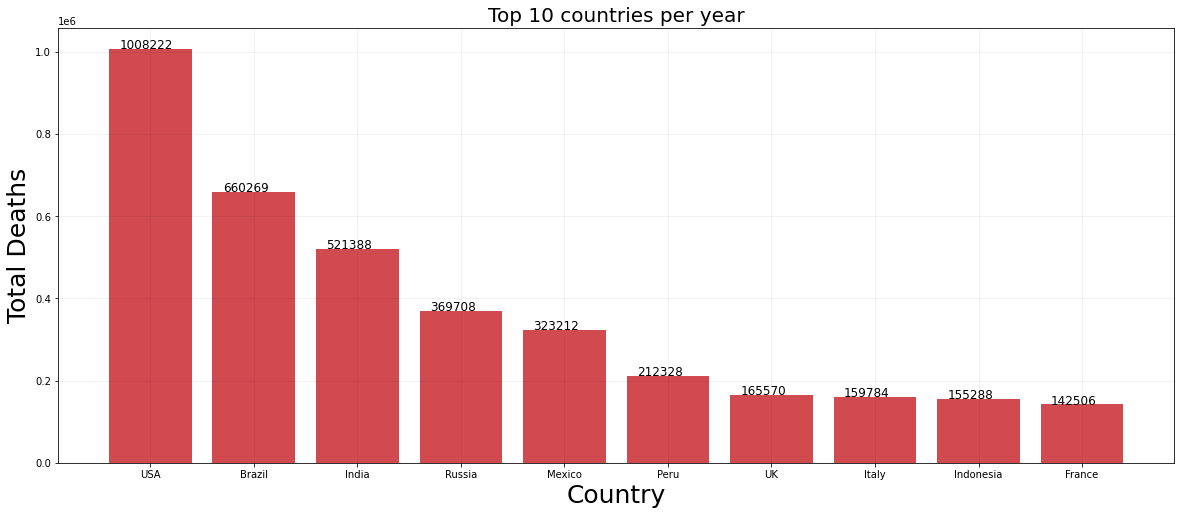

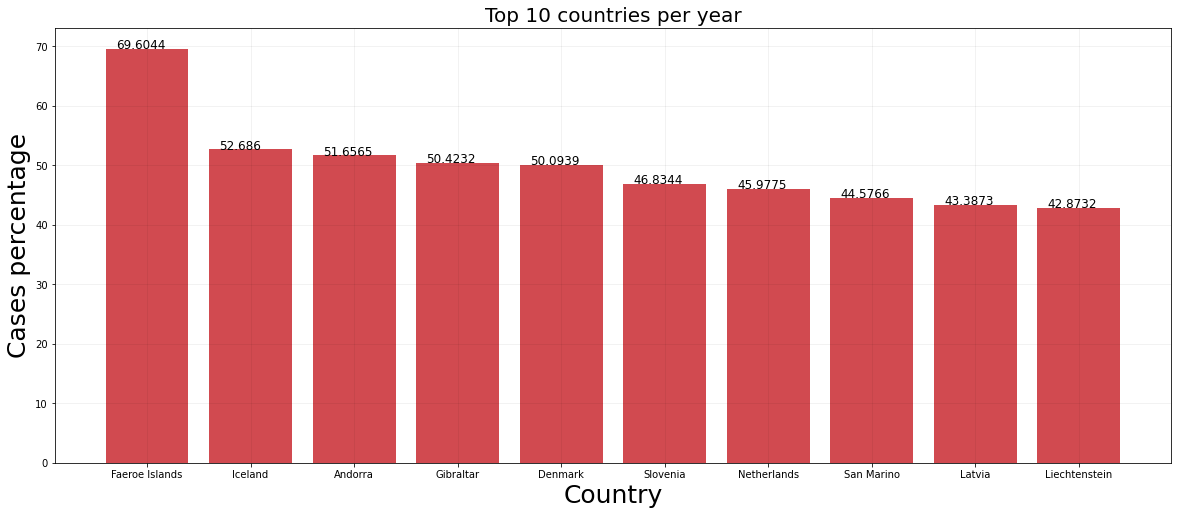

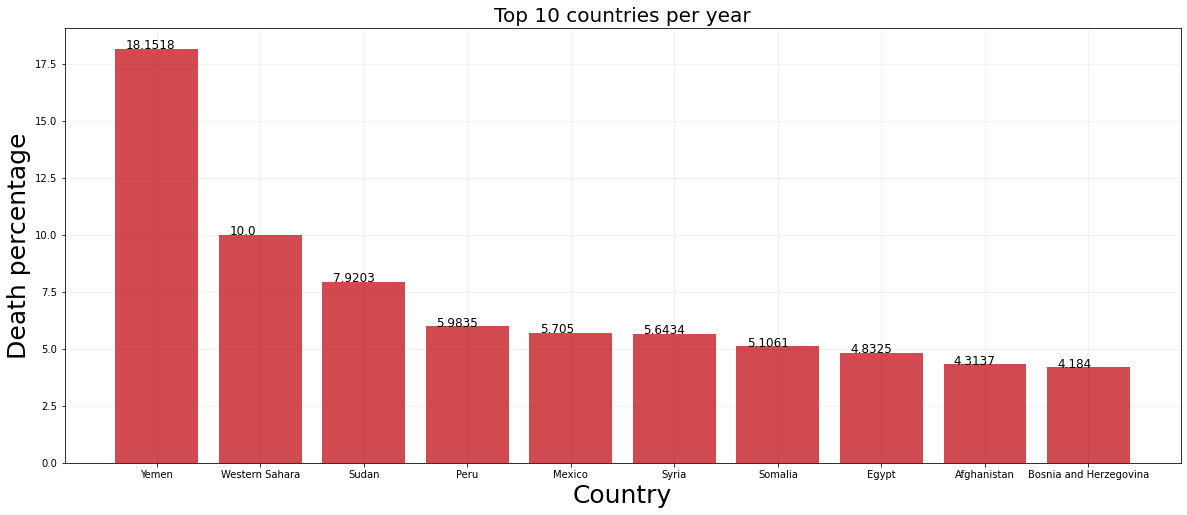

In [3]:
columns=['Population', 'Total Cases', 'Total Deaths','Cases percentage', 'Death percentage']
for column in columns:
  top10 = corona.nlargest(10,column)
  top = top10[columns]  
  plt.figure(figsize=(20,8))
  number = -0.3
  for text in top[column]:
        plt.text(x = number , y = float(text), s = str(round(text, 4)), size = 12) 
        number += 1
  plt.bar(top10['Country'], top10[column],color='#D14A50',alpha=1)
  plt.grid(b = True, color ='black',linestyle ='-', linewidth = 0.5, alpha = 0.1)
  plt.ylabel(column, fontsize = 25)
  plt.xlabel("Country", fontsize = 25)
  plt.title("Top 10 countries per year", fontsize = 20)
  plt.show()

Top 10 countries with smallest : Population , Total Casses, Total Deaths, Death percentage per year

<span style="font-size: 32px; color:#0B776D;">Top 10 countries with smallest :<li><U>Population per year</U></li>  <li><U>Total Casses per year</U></li> <li><U>Total Deaths per year</U></li> <li><U>Death percentage per year</U></li></span>

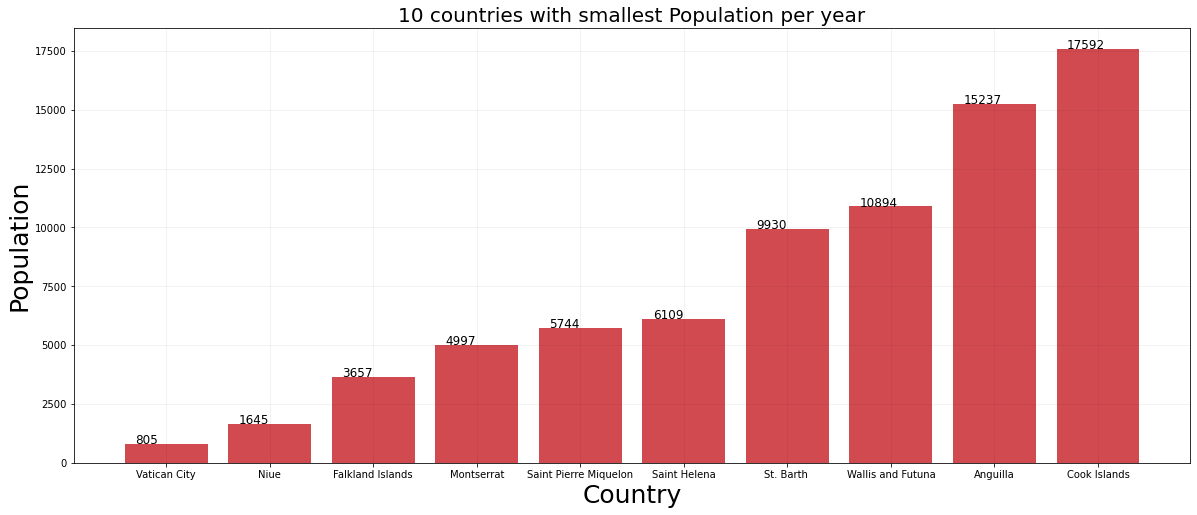

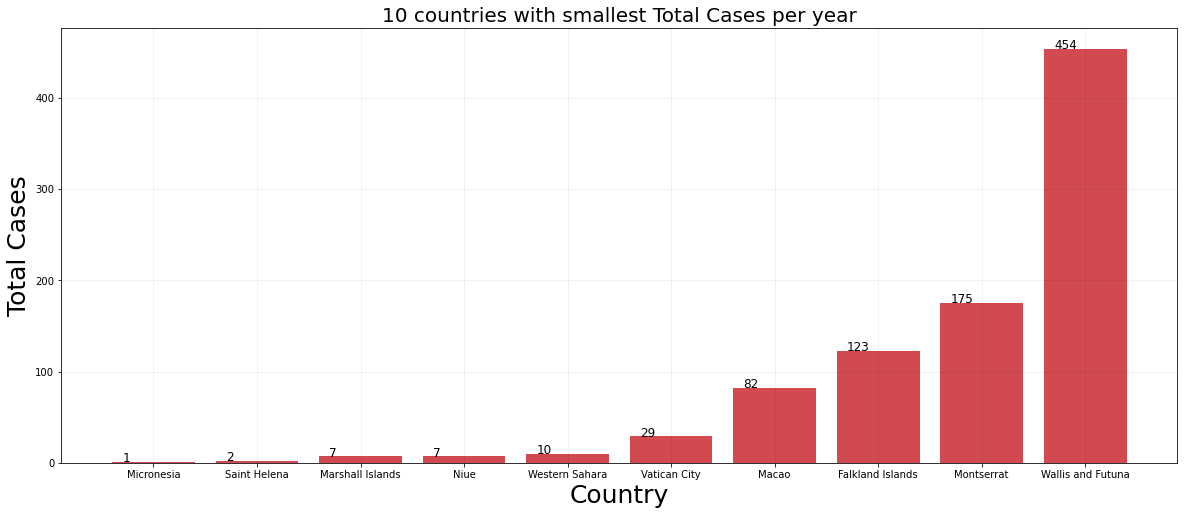

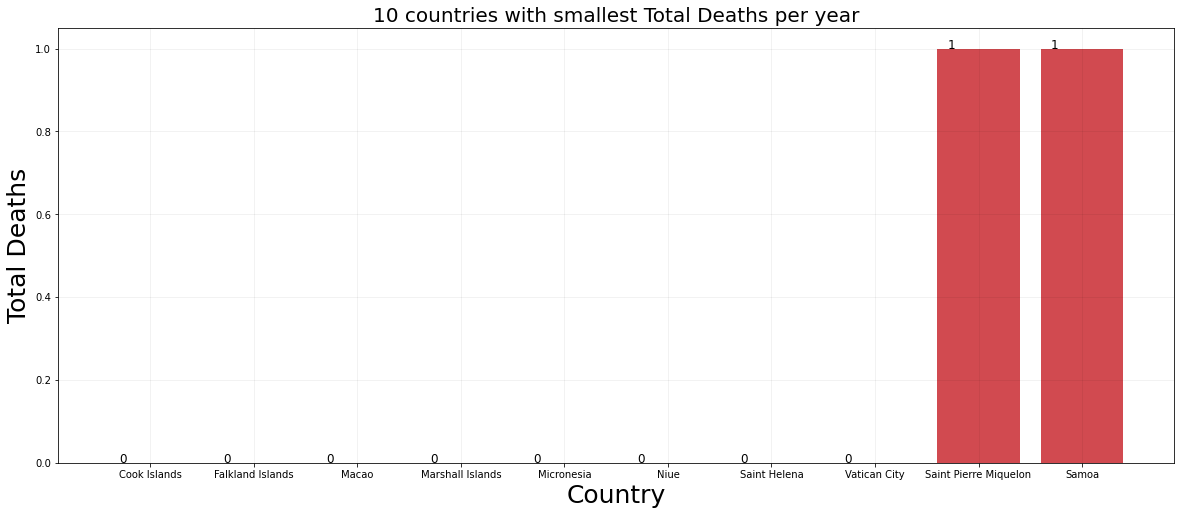

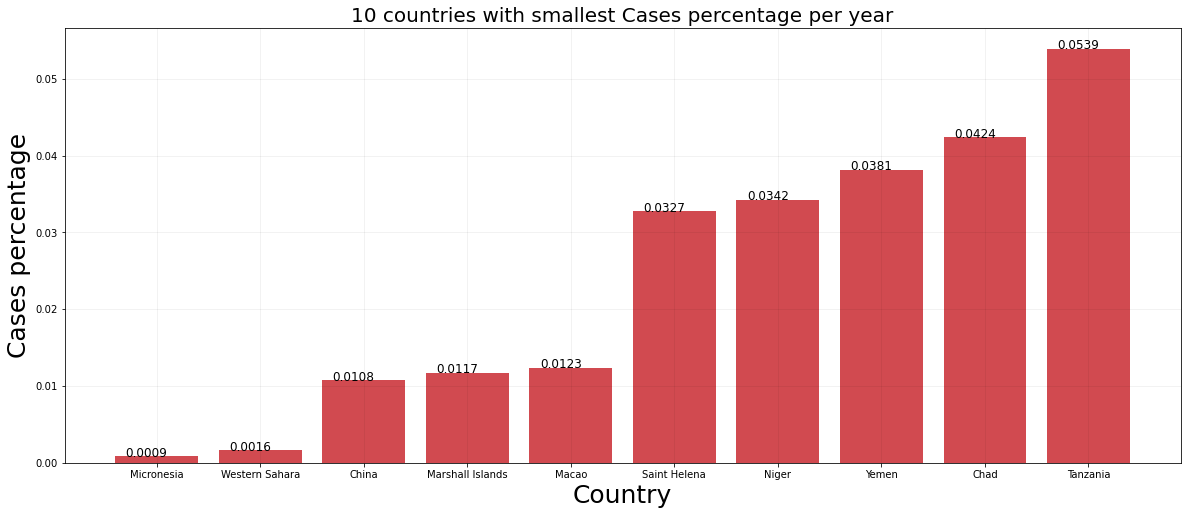

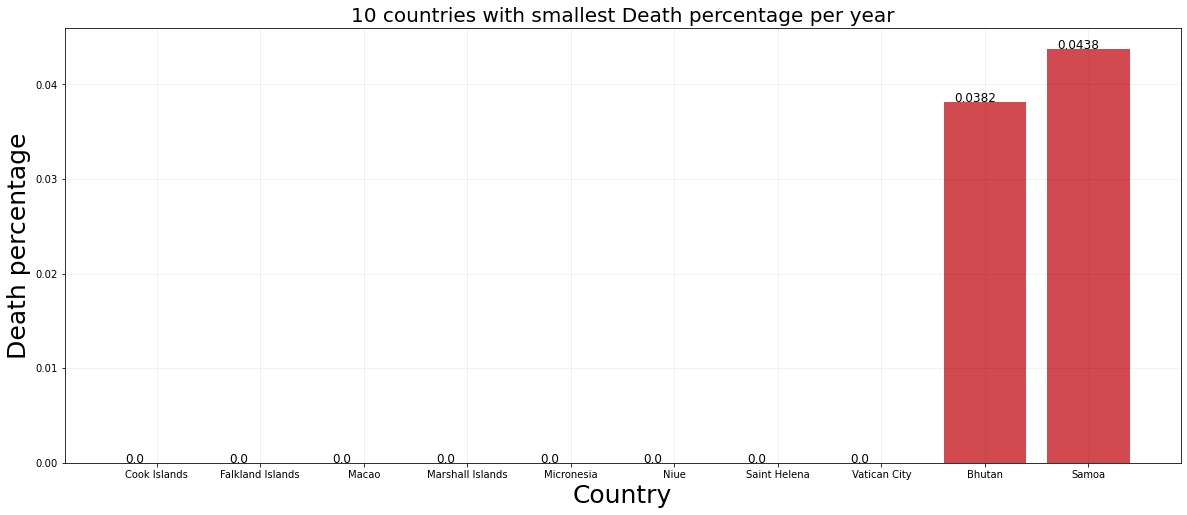

In [4]:
for column in columns:
  top10 = corona.nsmallest(10,column)
  top = top10[columns]
  plt.figure(figsize=(20,8))
  number = -0.3
  for text in top[column]:
        plt.text(x = number , y = float(text), s = str(round(text, 4)), size = 12) 
        number += 1
  plt.grid(b = True, color ='black',linestyle ='-', linewidth = 0.5, alpha = 0.1)
  plt.bar(top10['Country'], top10[column],color='#D14A50',alpha=1)
  plt.ylabel(column, fontsize = 25)
  plt.xlabel("Country", fontsize = 25)
  plt.title(f"10 countries with smallest {column} per year", fontsize = 20)
  plt.show()

In [5]:
top5 = corona.sort_values(by="Country", ascending=[False])
avg_cases = round(corona["Total Cases"].sum()/corona["Population"].sum()*100, 4)
avg_deaths = round(corona["Total Deaths"].sum()/corona["Total Cases"].sum()*100, 4)
top5.reset_index(inplace=True)

<span style="font-size: 32px; color:#0B776D;">Analysis of the <b>Cases percentage</b> rate from Covid-19 in countries</span>

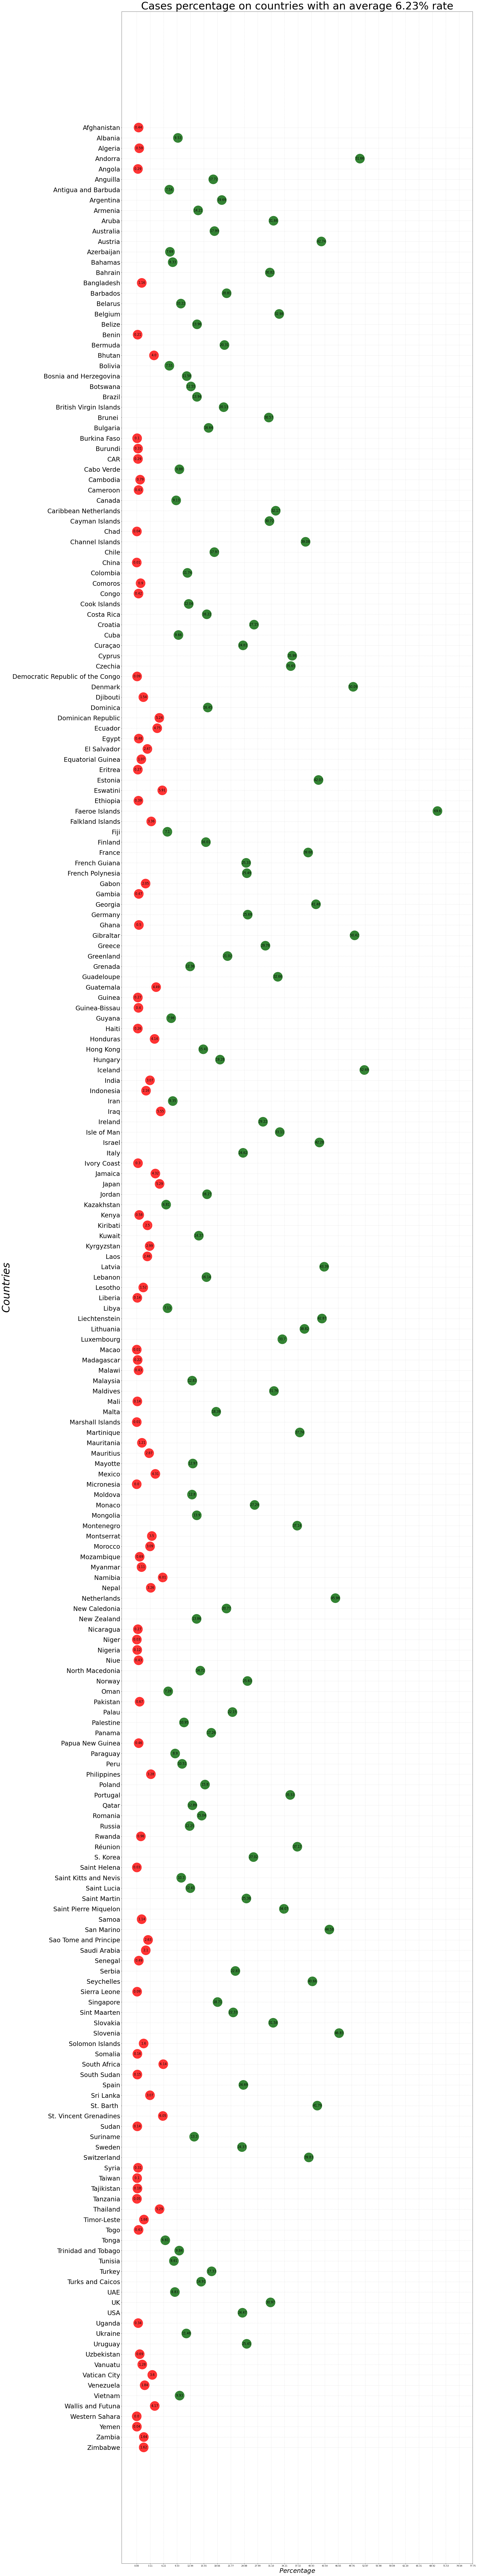

In [6]:
top5['colors'] = ['red' if x < avg_cases else 'darkgreen' for x in top5['Cases percentage']]
plt.figure(figsize=(30,224))
plt.scatter(top5["Cases percentage"], top5.index*2, s=2000, alpha=.8, color=top5["colors"])
plt.yticks([x for x in range(0, 450, 2)], top5.Country, fontsize=30)
for x, y, tex in zip(top5["Cases percentage"], top5.index*2, top5["Cases percentage"]):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='center', 
                 verticalalignment='center', color="Black", fontsize=15)
plt.xticks([x*3.11 for x in range(0, 26)])
plt.title('', fontdict={'size':30})
plt.xlabel('$Percentage$', fontsize=30)
plt.ylabel('$Countries$', fontsize=50)
plt.title('Cases percentage on countries with an average 6.23% rate', fontsize=50)
plt.grid(linestyle='--', alpha=0.5)
plt.show()

<span style="font-size: 32px; color:#0B776D;">Analysis of the <b>Death percentage</b> rate from Covid-19 in countries</span>

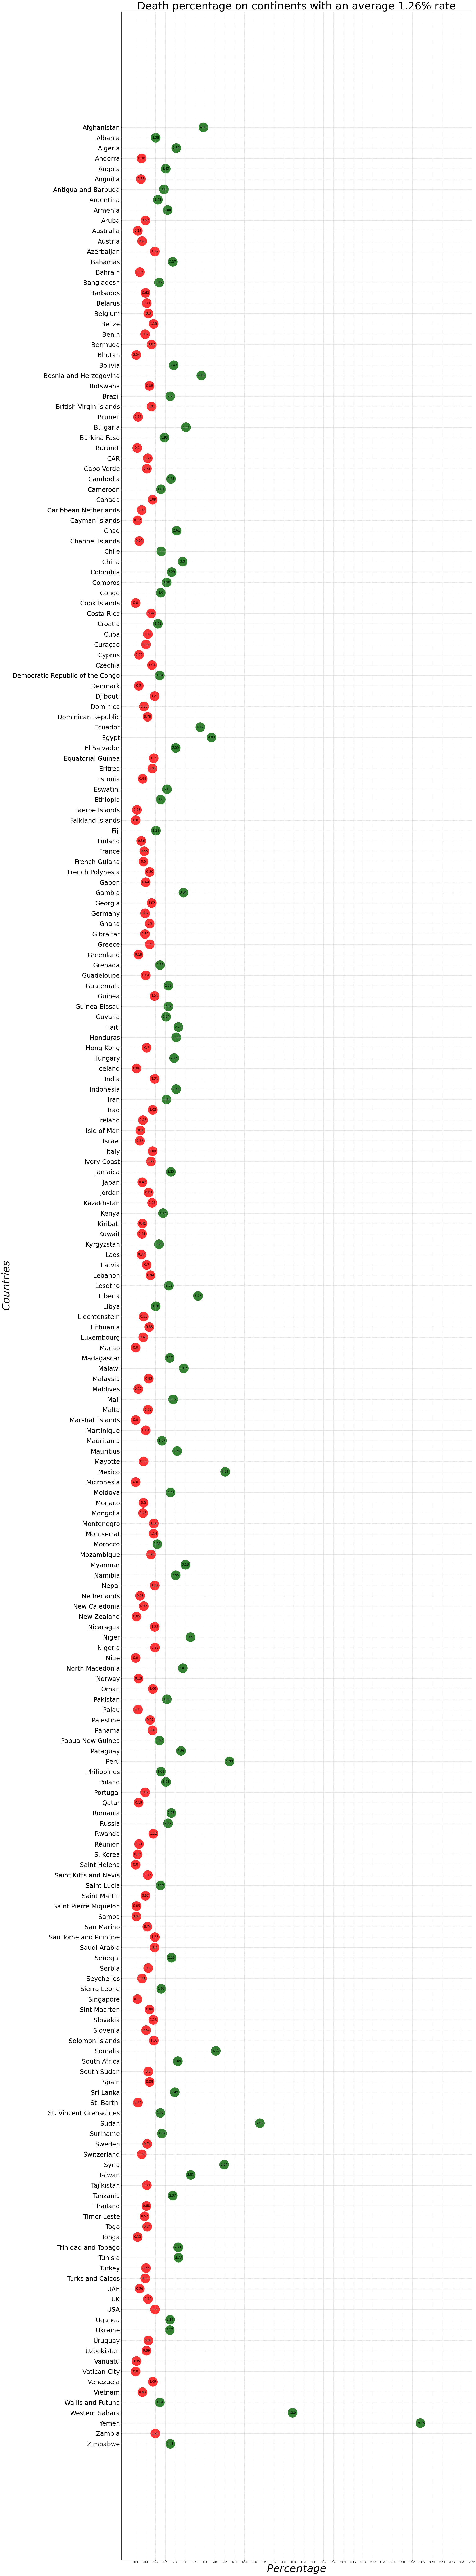

In [7]:
top5['colors1'] = ['red' if x < avg_deaths else 'darkgreen' for x in top5['Death percentage']]
plt.figure(figsize=(30,224))
plt.scatter(top5["Death percentage"], top5.index*2, s=2000, alpha=.8, color=top5["colors1"])
plt.yticks([x for x in range(0, 450, 2)], top5.Country, fontsize=30)
for x, y, tex in zip(top5["Death percentage"], top5.index*2, top5["Death percentage"]):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='center', 
            verticalalignment='center', color="Black", fontsize=15)
plt.xticks([x*0.63 for x in range(35)])
plt.xlabel('$Percentage$', fontsize=50)
plt.ylabel('$Countries$', fontsize=50)
plt.title('Death percentage on continents with an average 1.26% rate', fontsize=50)
plt.grid(linestyle='--', alpha=0.5)
plt.show()

<span style="font-size: 32px; color:#0B776D;margin-left:20px;">Analysis of the situation with COVID-19 on the continents</span>

In [8]:
corona_in_continents = corona.groupby("Continent").sum()
corona_in_continents['Cases percentage'] = corona_in_continents["Total Cases"]/corona_in_continents["Population"]*100
corona_in_continents["Death percentage"] = corona_in_continents["Total Deaths"]/corona_in_continents["Total Cases"]*100
corona_in_continents.sort_values(by="Death percentage", ascending=[False])

Population  Total Cases  Total Deaths  \
Continent                                                                
Latin America and the Caribbean   661325824     67509231       1686828   
Africa                           1396751613     11764207        252873   
Northern America                  372846593     85364770       1046062   
Asia                             4668689344    140957179       1405003   
Europe                            748420351    180332483       1775727   
Oceania                            43437948      5647957          9336   

                                 Cases percentage  Death percentage  
Continent                                                            
Latin America and the Caribbean         10.208165          2.498663  
Africa                                   0.842255          2.149512  
Northern America                        22.895414          1.225402  
Asia                                     3.019202          0.996759  
Europe                                  24.095080          0.984696  
Oceania                                 13.002357          0.165299

<span style="font-size: 32px; color:#0B776D;">Analysis of continents on: <li><U>Total Deaths per year</U></li> <li><U>Total Cases per year</U></li></span>

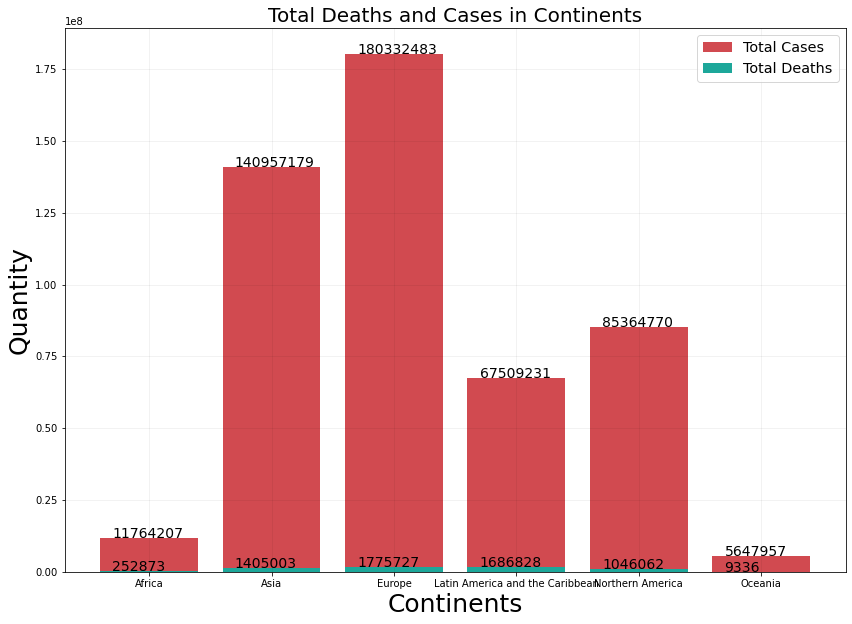

In [9]:
plt.figure(figsize=(14,10))
plt.grid(b = True, color ='black',linestyle ='-', linewidth = 0.5, alpha = 0.1)
plt.bar(corona_in_continents.index, corona_in_continents["Total Cases"],color='#D14A50',alpha=1, label='Total Cases')
plt.bar(corona_in_continents.index, corona_in_continents["Total Deaths"],color='#1DA79A',alpha=1, label='Total Deaths')
number = -0.3
for x in corona_in_continents["Total Cases"]:
    plt.text(x = number , y = float(x), s = x, size = 14) 
    number += 1
number = -0.3
for y in corona_in_continents["Total Deaths"]:
    plt.text(x = number , y = float(y), s = y, size = 14) 
    number += 1
plt.ylabel("Quantity", fontsize = 25)
plt.xlabel("Continents", fontsize = 25)
plt.legend(fontsize="x-large")
plt.title("Total Deaths and Cases in Continents", fontsize = 20)
plt.show()

<span style="font-size: 32px; color:#0B776D;">Analysis of the <b>Cases percentage</b> rate from Covid-19 on the continents</span>

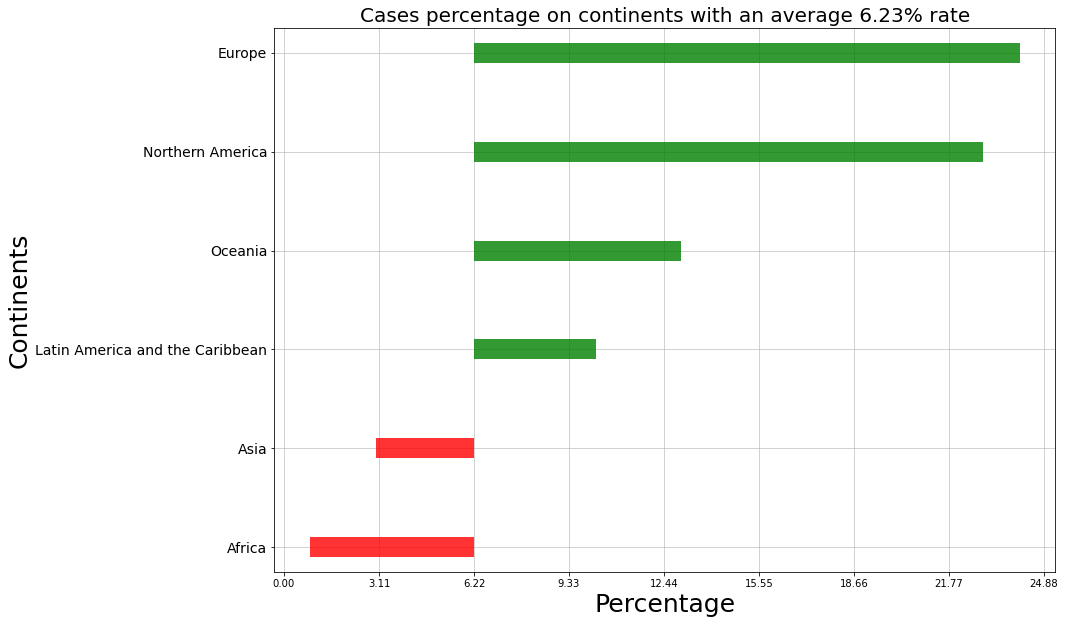

In [10]:
corona_in_continents['colors'] = ['red' if x < avg_cases else 'green' for x in corona_in_continents['Cases percentage']]
corona_in_continents.sort_values('Cases percentage', inplace=True)
plt.figure(figsize=(14,10))
plt.hlines(y=corona_in_continents.index, xmin=avg_cases, xmax=corona_in_continents['Cases percentage'], color=corona_in_continents.colors, alpha=0.8, linewidth=20)
plt.xlabel("Percentage", fontsize = 25)
plt.ylabel("Continents", fontsize = 25)
plt.yticks(corona_in_continents.index, fontsize=14)
plt.title('Cases percentage on continents with an average 6.23% rate', fontsize=20)
plt.xticks([x*3.11 for x in range(9)])
plt.grid(linestyle='-', alpha=0.7)
plt.show()

<span style="font-size: 32px; color:#0B776D;">Analysis of the <b>Death percentage</b> rate from Covid-19 on the continents</span>

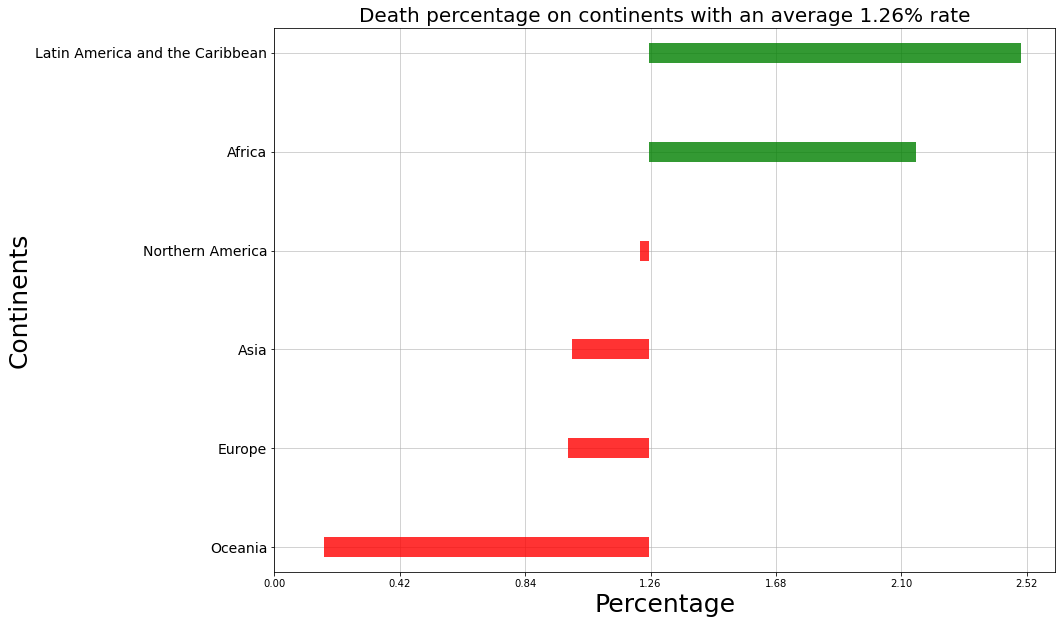

In [11]:
corona_in_continents['colors'] = ['red' if x < avg_deaths else 'green' for x in corona_in_continents['Death percentage']]
corona_in_continents.sort_values('Death percentage', inplace=True)
plt.figure(figsize=(14,10))
plt.xlabel("Percentage", fontsize = 25)
plt.ylabel("Continents", fontsize = 25)
plt.hlines(y=corona_in_continents.index, xmin=avg_deaths, xmax=corona_in_continents['Death percentage'], color=corona_in_continents.colors, alpha=0.8, linewidth=20)
plt.yticks(corona_in_continents.index, fontsize=14)
plt.title('Death percentage on continents with an average 1.26% rate', fontsize=20)
plt.xticks([x*0.42 for x in range(7)])
plt.grid(linestyle='-', alpha=0.7)
plt.show()

<span style="font-size: 32px; color:#0B776D;">Interactive analysis of the <b>Countries</b>  from Covid-19 </span>

In [4]:
lis = ['Population', 'Total Cases', 'Total Deaths']

com_box = widgets.Combobox(
    placeholder='Country',
    options=list(corona.Country),
    description='Write country to analyze:',
    ensure_option=True,
    value="Ukraine",
    disabled=False, style={"description_width": "initial"})
dpd = widgets.Dropdown(
    options=[('Population', 0), ('Total Cases', 1), ('Total Deaths', 2)],
    value=0,
    description='Select a category to analyze:', style={"description_width": "initial"})
col_p = widgets.ColorPicker(
    concise=False,
    description='Pick a color',
    value='red',
    disabled=False)

accordion = widgets.Accordion(children=[com_box , dpd, col_p])
accordion.set_title(0, 'Choose country to analyze')
accordion.set_title(1, 'Choose category')
accordion.set_title(2, 'Color')

def pie(com_box1, dpd1, col_p1):
    index = corona[corona['Country'] == com_box1].index.values.astype(int)
    row = corona.iloc[index]
    number_country = row[f"{lis[dpd1]}"]
    number_all = corona[f"{lis[dpd1]}"].sum() - number_country
    ls = []
    ls.append(number_country)
    ls.append(number_all) 
    l = pd.DataFrame({"pop": ls})
    plt.pie(l["pop"], autopct = "%1.2f%%", labels=[f"{com_box1}", "Total number"], colors=[f"{col_p1}", "orange"])
    plt.legend(bbox_to_anchor=(1.0, 1.0))
    plt.title(f"Analysis of the {lis[dpd1]} in {com_box1} to the total")
    ls.clear
out = widgets.interactive_output(pie, {'com_box1': com_box, 'dpd1': dpd, 'col_p1': col_p})
display(accordion, out)

Accordion(children=(Combobox(value='Ukraine', description='Write country to analyze:', ensure_option=True, opt…

Output()